# 1. Install Dependencies and Setup

In [1]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
# !pip list

In [3]:
import tensorflow as tf
# OS to get the file path and directory folders with ease
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth (Optional)
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
    # tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
# We don't have a GPU right now
tf.config.experimental.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2                              # Allows to do computer vision
import imghdr                           # Check the file extenstion
from matplotlib import pyplot as plt    # For visualization

In [7]:
data_dir = 'data'

In [8]:
os.listdir(data_dir)

['messi', 'ronaldo']

In [9]:
os.listdir(os.path.join(data_dir, 'messi'))[0:10]

['1192549776.jpeg',
 '1200x-1.jpg',
 '16648134351564.png',
 '170px-Leo_Messi_2016.PNG.jpg',
 '210805-lionel-messi-barcelona-mn-1415.jpg',
 '220530124443-02-paris-saint-germain-lionel-messi-052122-restricted.jpg',
 '28003-1631171950.jpg',
 '33411-list.jpg',
 '54576763_605.jpg',
 'ad-u-Messi.jpg']

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [11]:
lionel_messi_path = os.path.join(data_dir, 'messi', 'lionel_messi.jpg')
lionel_messi = cv2.imread(os.path.join(data_dir, 'messi', 'lionel_messi.jpg'))
lionel_messi

array([[[204, 197, 194],
        [204, 197, 194],
        [204, 197, 194],
        ...,
        [205, 198, 195],
        [205, 198, 195],
        [205, 198, 195]],

       [[204, 197, 194],
        [204, 197, 194],
        [204, 197, 194],
        ...,
        [205, 198, 195],
        [205, 198, 195],
        [205, 198, 195]],

       [[204, 197, 194],
        [204, 197, 194],
        [204, 197, 194],
        ...,
        [205, 198, 195],
        [205, 198, 195],
        [205, 198, 195]],

       ...,

       [[195, 190, 187],
        [195, 190, 187],
        [195, 190, 187],
        ...,
        [215, 208, 205],
        [215, 208, 205],
        [215, 208, 205]],

       [[196, 191, 188],
        [195, 190, 187],
        [195, 190, 187],
        ...,
        [215, 208, 205],
        [215, 208, 205],
        [215, 208, 205]],

       [[195, 190, 187],
        [196, 191, 188],
        [196, 191, 188],
        ...,
        [215, 208, 205],
        [215, 208, 205],
        [215, 208, 205]]

In [12]:
# 500 high, 400 wide, 3 channel (coloured)
lionel_messi.shape

(500, 400, 3)

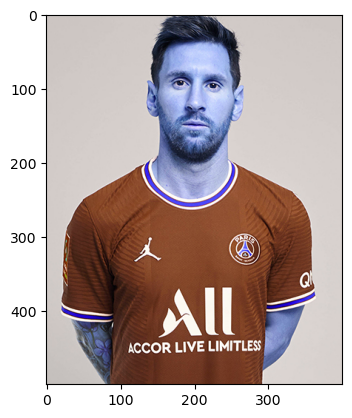

In [13]:
# Different color - Open CV reads img in bgr and matplotlib reads in rgb
plt.imshow(lionel_messi);

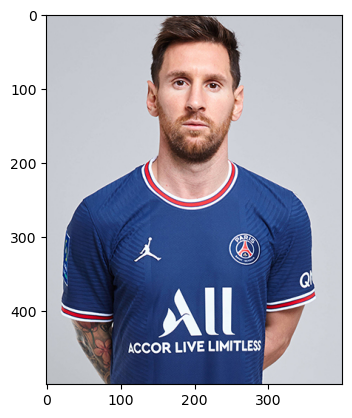

In [14]:
plt.imshow(cv2.cvtColor(lionel_messi, cv2.COLOR_BGR2RGB));

In [15]:
imghdr.what(lionel_messi_path)

'jpeg'

In [16]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}")
            os.remove(image_path)
    print(f"{image_class} is clean")

messi is clean
ronaldo is clean


In [17]:
# Image not in ext list data\messi\skysports-lionel-messi-barcelona_5219999.jpg
# Image not in ext list data\messi\skysports-lionel-messi-barcelona_5360554.jpg
# Image not in ext list data\messi\skysports-lionel-messi-barcelona_5390329.jpg
# Image not in ext list data\ronaldo\skysports-cristiano-ronaldo_5823297.jpg
# Image not in ext list data\ronaldo\skysports-cristiano-ronaldo_5882500.jpg
# Image not in ext list data\ronaldo\skysports-cristiano-ronaldo_5926790.jpg

# 3. Load Data

In [18]:
# To view the documentation
# tf.data.Dataset??

In [19]:
import numpy as np

In [20]:
# tf.keras.utils.image_dataset_from_directory??

# color_mode='rgb',
# batch_size=32,
# image_size=(256, 256),
# shuffle=True,
# seed=None,
# validation_split=None

In [21]:
# We are now having the data as batches, compressed and scaled
data = tf.keras.utils.image_dataset_from_directory('data')

Found 166 files belonging to 2 classes.


In [22]:
# Loop through that classes
data_iterator = data.as_numpy_iterator()
data_iterator

In [23]:
batch = data_iterator.next()
len(batch), batch[0].shape, batch[1].shape

(2, (32, 256, 256, 3), (32,))

In [24]:
batch[0][:2], batch[1][:2]

(array([[[[ 34.       ,  27.       ,  35.       ],
          [ 34.       ,  27.       ,  35.       ],
          [ 33.015625 ,  27.       ,  34.507812 ],
          ...,
          [ 15.       ,  18.       ,  23.       ],
          [ 14.6953125,  18.304688 ,  23.       ],
          [ 14.       ,  19.       ,  23.       ]],
 
         [[ 36.841797 ,  27.       ,  35.947266 ],
          [ 34.86586  ,  27.       ,  35.28862  ],
          [ 33.94809  ,  27.       ,  34.974045 ],
          ...,
          [ 16.87973  ,  18.947266 ,  23.947266 ],
          [ 15.931198 ,  18.963333 ,  23.947266 ],
          [ 15.894531 ,  19.       ,  23.947266 ]],
 
         [[ 39.73633  ,  28.824219 ,  36.91211  ],
          [ 38.28459  ,  28.190018 ,  36.216797 ],
          [ 36.30165  ,  27.91211  ,  35.46318  ],
          ...,
          [ 21.095993 ,  21.2874   ,  26.273148 ],
          [ 20.560547 ,  21.736328 ,  25.824219 ],
          [ 20.560547 ,  21.736328 ,  25.824219 ]],
 
         ...,
 
         [[ 

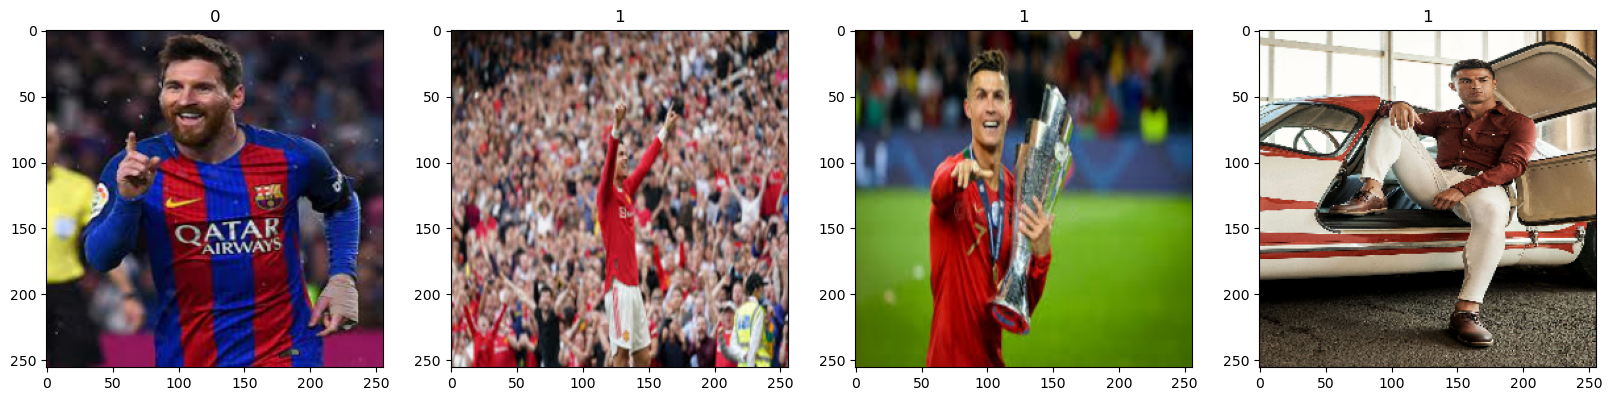

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# Ronaldo is 1 
# Messi is 0

# 4. Scale Data

In [26]:
batch[0].min(), batch[0].max()

(0.0, 255.0)

In [27]:
# x is images
# y is target variable
scaled_data = data.map(lambda x, y: (x/255, y))

In [28]:
scaled_data.as_numpy_iterator().next()[0].min(), scaled_data.as_numpy_iterator().next()[0].max()

(0.0, 1.0)

In [29]:
scaled_iterator = scaled_data.as_numpy_iterator()
batch = scaled_iterator.next()

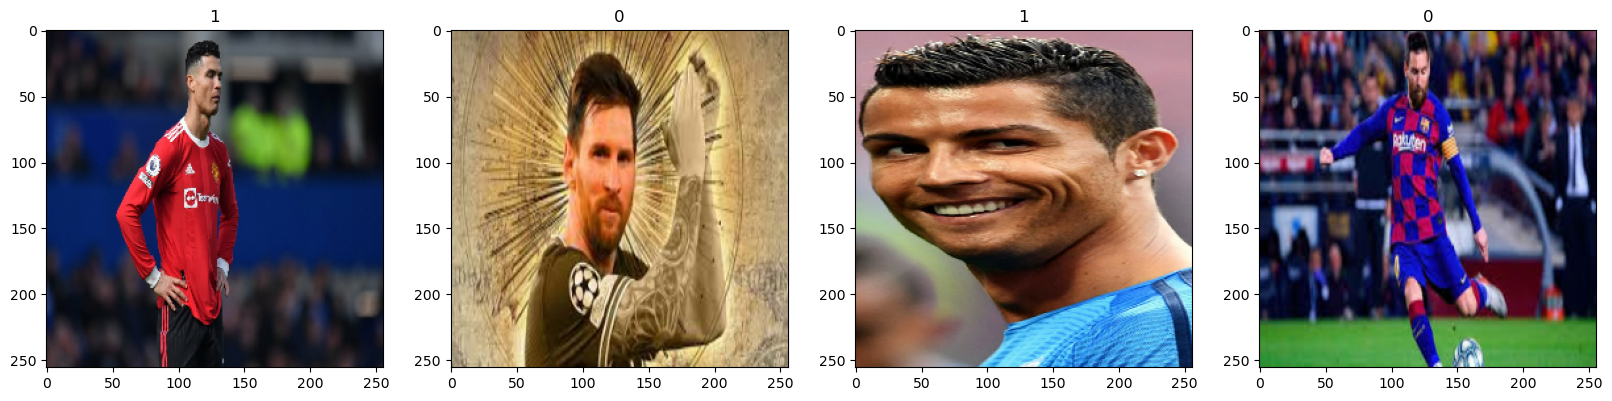

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [31]:
batch[0][:2], batch[1][:2]

(array([[[[0.0437883 , 0.055553  , 0.07516085],
          [0.03594516, 0.04770986, 0.06731771],
          [0.03921569, 0.05098039, 0.07058824],
          ...,
          [0.45490196, 0.49411765, 0.5411765 ],
          [0.44770986, 0.48692554, 0.53398436],
          [0.44770986, 0.48692554, 0.53398436]],
 
         [[0.05098039, 0.0627451 , 0.08235294],
          [0.04313726, 0.05490196, 0.07450981],
          [0.03921569, 0.05098039, 0.07058824],
          ...,
          [0.45490196, 0.49411765, 0.5411765 ],
          [0.4568551 , 0.49607077, 0.5431296 ],
          [0.4568551 , 0.49607077, 0.5431296 ]],
 
         [[0.05356924, 0.06533395, 0.08494179],
          [0.04639246, 0.05815717, 0.07776501],
          [0.0457261 , 0.05749081, 0.07709865],
          ...,
          [0.45815718, 0.49737287, 0.5444317 ],
          [0.45948988, 0.49870557, 0.5457644 ],
          [0.45948988, 0.49870557, 0.5457644 ]],
 
         ...,
 
         [[0.26733303, 0.19282322, 0.2085095 ],
          [0.27450

In [32]:
# 6 batch with each having 32 images
len(data)

6

In [33]:
train_size = int(len(scaled_data)*.6)
val_size = int(len(scaled_data)*.2)+1
test_size = int(len(scaled_data)*.1)+1

In [34]:
train_size, val_size, test_size

(3, 2, 1)

In [35]:
train_size + test_size + val_size

6

In [36]:
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [37]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
# tf have sequential and functional API, where Sequential take one input and return one output (forward propagation)
from tensorflow.keras.models import Sequential
# Different layers in model - 
# Convolutional 2D NN, Return Max Value, Fully Connected Layer, Helps the CNN for one output, Used for Regularization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [39]:
model = Sequential()

In [40]:
# MaxPooling2D??

# MaxPooling2D(
#     pool_size=(2, 2),
#     strides=None,
#     padding='valid',
#     data_format=None

In [41]:
# 16 filters with 3*3px and move 1px each time
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [44]:
logdir='logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
history = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
3/3 [==============================] - 6s 1s/step - loss: 1.3713 - accuracy: 0.6250 - val_loss: 1.2842 - val_accuracy: 0.4219
Epoch 2/25
3/3 [==============================] - 4s 1s/step - loss: 1.1333 - accuracy: 0.3646 - val_loss: 0.6400 - val_accuracy: 0.7656
Epoch 3/25
3/3 [==============================] - 4s 1s/step - loss: 0.6413 - accuracy: 0.6458 - val_loss: 0.6142 - val_accuracy: 0.6094
Epoch 4/25
3/3 [==============================] - 4s 1s/step - loss: 0.5787 - accuracy: 0.6667 - val_loss: 0.6299 - val_accuracy: 0.5781
Epoch 5/25
3/3 [==============================] - 4s 1s/step - loss: 0.5931 - accuracy: 0.6354 - val_loss: 0.5543 - val_accuracy: 0.6719
Epoch 6/25
3/3 [==============================] - 4s 1s/step - loss: 0.6049 - accuracy: 0.6042 - val_loss: 0.5332 - val_accuracy: 0.8125
Epoch 7/25
3/3 [==============================] - 4s 1s/step - loss: 0.5335 - accuracy: 0.7708 - val_loss: 0.4869 - val_accuracy: 0.7500
Epoch 8/25
3/3 [=========================

In [48]:
history

In [49]:
history.history

{'loss': [1.3712725639343262,
  1.1333004236221313,
  0.641320526599884,
  0.5787411332130432,
  0.5930882096290588,
  0.6048567891120911,
  0.5334610342979431,
  0.5178017020225525,
  0.4426514208316803,
  0.415994793176651,
  0.27327361702919006,
  0.2731393873691559,
  0.2738594710826874,
  0.18920660018920898,
  0.151280477643013,
  0.1738673448562622,
  0.13281305134296417,
  0.119590163230896,
  0.0840907022356987,
  0.07833931595087051,
  0.05548528954386711,
  0.04709376022219658,
  0.03018697164952755,
  0.02142648585140705,
  0.01963927410542965],
 'accuracy': [0.625,
  0.3645833432674408,
  0.6458333134651184,
  0.6666666865348816,
  0.6354166865348816,
  0.6041666865348816,
  0.7708333134651184,
  0.71875,
  0.8020833134651184,
  0.7916666865348816,
  0.9166666865348816,
  0.90625,
  0.84375,
  0.9583333134651184,
  0.9583333134651184,
  0.9270833134651184,
  0.9583333134651184,
  0.9895833134651184,
  0.96875,
  0.96875,
  0.9895833134651184,
  0.9895833134651184,
  1.0,
 

In [50]:
model.save(os.path.join('models','imageclassifier.h5'))

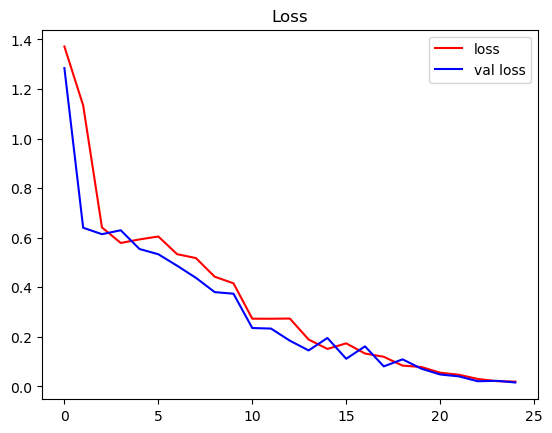

In [68]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss');
plt.plot(history.history['val_loss'], color='blue', label='val loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

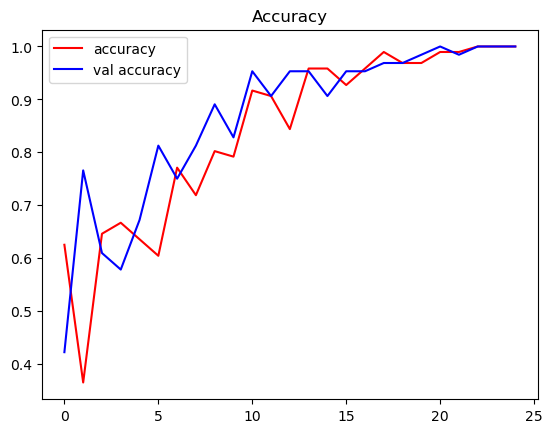

In [69]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='red', label='accuracy');
plt.plot(history.history['val_accuracy'], color='blue', label='val accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.show()

# 9. Evaluate

In [70]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [71]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [72]:
len(test)

1

In [73]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 301ms/step


In [88]:
print(f"Precision: {pre.result().numpy()} Recall: {re.result().numpy()} Accuracy: {acc.result().numpy()}")

Precision: 1.0 Recall: 1.0 Accuracy: 1.0


# 10. Test

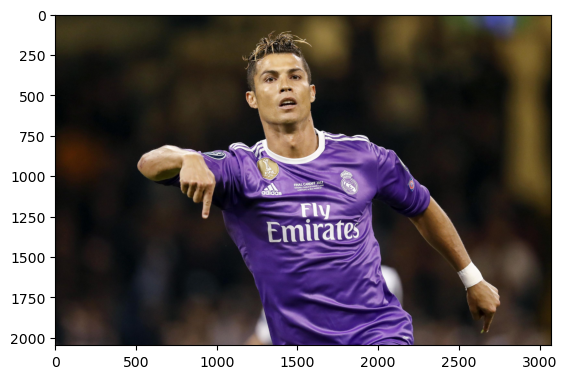

In [108]:
img = cv2.imread('messi.jpg')
img = cv2.imread('ronaldo.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

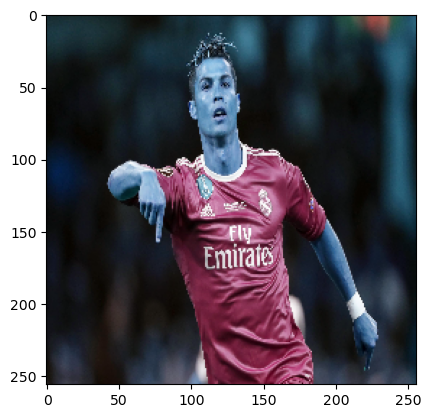

In [109]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int));

In [110]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 27.  ,  59.  ,  74.  ],
        [ 26.  ,  52.75,  67.25],
        [ 22.25,  44.75,  54.25],
        ...,
        [ 35.5 ,  86.5 , 112.5 ],
        [ 38.  ,  89.  , 115.  ],
        [ 40.5 ,  94.5 , 119.5 ]],

       [[ 24.  ,  52.5 ,  63.5 ],
        [ 24.25,  49.25,  59.25],
        [ 24.75,  44.5 ,  50.  ],
        ...,
        [ 33.75,  84.75, 110.75],
        [ 41.5 ,  92.5 , 118.5 ],
        [ 41.75,  95.75, 120.75]],

       [[ 26.5 ,  48.5 ,  59.5 ],
        [ 25.75,  44.75,  51.75],
        [ 21.75,  40.75,  47.75],
        ...,
        [ 40.  ,  91.  , 117.  ],
        [ 45.  ,  96.  , 122.  ],
        [ 42.5 ,  96.5 , 121.5 ]],

       ...,

       [[ 32.  ,  28.  ,  27.  ],
        [ 28.75,  23.75,  20.75],
        [ 26.  ,  21.  ,  18.  ],
        ...,
        [ 41.5 ,  65.5 ,  83.5 ],
        [ 43.25,  67.25,  85.25],
        [ 35.5 ,  59.5 ,  77.5 ]],

       [[ 37.75,  32.75,  34.25],
        [ 30.5 ,  26.5

In [111]:
resize.shape, np.expand_dims(resize/255, 0).shape

(TensorShape([256, 256, 3]), (1, 256, 256, 3))

In [112]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 56ms/step


In [129]:
print(f"yhat: {yhat[0][0]:.4f}")
if yhat > 0.5: 
    print(f'Predicted as Ronaldo')
else:
    print(f'Predicted as Messi')

yhat: 0.9580
Predicted as Ronaldo


# 11. Save the Model

In [130]:
from tensorflow.keras.models import load_model

In [131]:
model.save(os.path.join('models','imageclassifier.h5'))

In [132]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [136]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))
yhat_new

1/1 [==============================] - 0s 58ms/step


array([[0.9580329]], dtype=float32)

In [137]:
print(f"yhat: {yhat_new[0][0]:.4f}")
if yhat_new > 0.5: 
    print(f'Predicted as Ronaldo')
else:
    print(f'Predicted as Messi')

yhat: 0.9580
Predicted as Ronaldo
